c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python39\lib\site-package

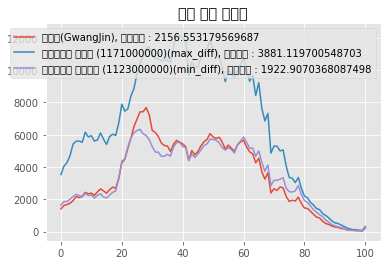

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

result = []

f = open('population_status_by_age.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)
header2 = next(data)

loc_a = '광진'
np_array = []

for d in data:
    for i in range(len(d)):
        d[i] = d[i].replace(",", "")

    if loc_a in d[0]:
        gj_np = np.array(d[3:], dtype=int)
    else:
        temp = np.array(d[3:], dtype=int)
        np_array.append((d[0], temp))

for array in np_array:
    d = array[1]
    sub_data = d - gj_np
    sq_data = sub_data ** 2
    num = sum(sq_data)

    result.append((num, array[0]))

result.sort()

max_num_loc = result[-1][1]
min_num_loc = result[0][1]

for arr in np_array:
    if max_num_loc in arr[0]:
        max_loc = arr[1]
    if min_num_loc in arr[0]:
        min_loc = arr[1]

a = np.std(gj_np)
b = np.std(max_loc)
c = np.std(min_loc)

plt.style.use('ggplot')
plt.title("인구 구조 그래프")
plt.plot(gj_np, label = '광진구(GwangJin), 표준편차 : ' + str(a))
plt.plot(max_loc, label = max_num_loc+"(max_diff), 표준편차 : " + str(b))
plt.plot(min_loc, label = min_num_loc+"(min_diff), 표준편차 : " + str(c))
plt.legend()
plt.show()
# 그래프에 한글 출력만 정상적으로 되지 않습니다.
